# Introduction

The goal of this project is to interpret data from the National Parks Service about endangered species in different parks. 

The analysis will be performed on the conservation statuses of these species. Further investigation will be done on the emergence of any patterns or themes to the types of endangered species.

**Questions outline:**
* What is the distribution of conservation status for species
* What types of species are more likely to be endangered

**Data sources:**
Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

# Scoping
Scoping is very useful for setting the boundaries of a new project. It has four sections and will start by defining the high-level goals of this project and how the project intended to achieve them. Following by data, ensuring available data to meet the project goals. Thridly, the analysis part will decide which measures to be included in alignment with the objectives of the project. Lastly, an evaluation will help us establish conclusions and findings from our analysis.

## Project Goals
We will be completing this project in the standpoint of a biodiversity analyst for the National Parks Service. It is a mission of the National Park Service to ensure the survival of at-risk species, to maintain the level of biodiversity under their watch. Thus, the dominating objectives in the viewpoint of an analyst is to investigate and understand the relationship between species of various conservation status and their characteristics, and between species and the parks. 
Here are some questions being posed:
* What is the distribution of conservation status for species?
* Are there certain types of species more prone to endangerment?
* Are there significant differences between species and their conservation status?
* Which animal is most prevalent and how are they distributed amongst parks?

## Data
This package of the project is embodied with two data sets: `species_info.csv` contains information of each species; `observation.csv` contains data of observations of species in various national park locations. These data will achieve the project goals via analysis.

## Analysis
In this part, descriptive statistics and data visualization techniques will be used to understand the data. Statistical inference will also be used to test if the observed values are statistically significant. The following are some of the major metrics to be employed for computation:
* Distributions
* Counts
* Relationship between species
* Conservation status of specis
* Observations of species in parks

## Evaluation
Last but not least, this part will review our goals and check if the questions posed are aptly answered by the analysed results. It is a good idea to also look at new discoveries and unanswered questions worth further investigations. Possible limitation of the analysis could also be included.

# Import Python Modules
Firstly, main modules to be used in this project will be imported here:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data
To make use of the data sets, load them into `DataFrames` so the data can be explored and visualized with Python.
Onced loaded, `Species_info.csv` and `Observations.csv` are read in as `DataFrames` named as `species` and `obs` respectively. We can then briefly look at the first few entries of the two `DataFrames` with `.head()`. 

In [3]:
species = pd.read_csv('Species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


## Species
The `Species_info.csv` contains information of different species in the National Parks with columns:
* **category** - The category of taxonomy for each species
* **scientific_name** - The scientific name of each species
* **common_names** - The common names of each species
* **conservation_status** - The species conservation status

In [4]:
obs = pd.read_csv('Observations.csv')
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Observations
The `Observations.csv` contains data of the recorded sightings of different species in various locations in the past 7 days. Columns of this `DataFrame` are:
* **scientific_name** - The scientific name of each species
* **park_name** - The name of the national park where sightings were recorded
* **observations** - The number of observations in the past 7 days

## Data Characteristics
In the next step, we will check for the dimensions of these data sets. For `species`, there are 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns. 

In [5]:
print("species dataframe shape:")
print(species.shape)
print("observations dataframe shape:")
print(obs.shape)

species dataframe shape:
(5824, 4)
observations dataframe shape:
(23296, 3)


## Explore the Data

### species 

Now it is time to explore the `species` data. Firstly, there are 5,541 distinct species as we can count the number of unique entries in the column `scientific_name`. 

In [6]:
print(f"number of distinct species: {species.scientific_name.nunique()}")

number of distinct species: 5541


Next is finding the number of `category` presented in the data. As shown below, there are 7 categories of species including animals and plants.

In [7]:
print(f"number of categories: {species.category.nunique()}")
print(f"categories: {species.category.unique()}")

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


With a quick look into the number of data entry per `category`, vascular plants claim the greatest share of all species with 4,470 while reptiles constitute the smallest share with 79. 

In [8]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Moving on to the `conservation_status` column, it has 4 categories, namely `Species of Concern`, `Endangered`, `Threatened`, `In Recovery` and `nan` values.

In [9]:
print(f"number of conservation statuses: {species.conservation_status.nunique()}")
print(f"conservation statuses: {species.conservation_status.unique()}")

number of conservation statuses: 4
conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Here is a chance to drill into this column by counting the number of nan values and revealing the number of species in each status. There are 5,633 `nan` values, which means that these species are without concerns. Meanwhile, there are 161 species of concern, 16 endangered, 10 threatened and 4 in recovery.

Note: In most cases `nan` values should be given careful attention. However, in this data, the `nan` values are structrually missing values since they denote species not under any conservation status.

In [10]:
print(f"number of nan values: {species.conservation_status.isna().sum()}")
print(species.groupby('conservation_status').size())

number of nan values: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


### observations

Second part of exploring data will work on the `observations` data. There are 4 parks in the `park_name` column, including: `Great Smoky Mountains National Park`, `Yosemite National Park`, `Bryce National Park` and `Yellowstone National Park`.

In [11]:
print(f"number of parks: {obs.park_name.nunique()}")
print(f"parks: {obs.park_name.unique()}")

number of parks: 4
parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


A breakdown of counts in each park is done, showing that each park constitutes 5,824 entries of the `observation` data.

In [12]:
print(obs.groupby('park_name').size())

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64


In total, there are 3,314,739 sightings in the last 7 days.

In [13]:
print(f"total number of sightings: {obs.observations.sum()}")

total number of sightings: 3314739


## Analysis

After exploration of the two data sets, this section will begin by cleaining and further exploring the `conservation_status` column in species.

The column `conservation_status` has 4 values:

* `Species of Concern`: declining or appear to be in need of conservation
* `Threatened`: vulnerable to endangerment in the near future
* `Endangered`: seriously at risk of extinction
* `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all of a significant portion of its range. 

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [14]:
species.fillna('No Intervention', inplace=True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to discover the categories of species nested in `conservation_status` column except for `No Intervention`. A table and chart has been created below.

For those in the `Endangered` status, 7 were mammals, 4 were birds, 3 were fist and 1 was amphibian. There is no endangered nonvascular plant. 

As for those in the `In Recovery` status, there were 3 birds and 1 mammal, possibly denoting a higher chance of bouncing back of birds when compared with mammals.

In [15]:
conservedspecies = species[species.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])\
    ['scientific_name']\
    .count()\
    .unstack()

conservedspecies


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

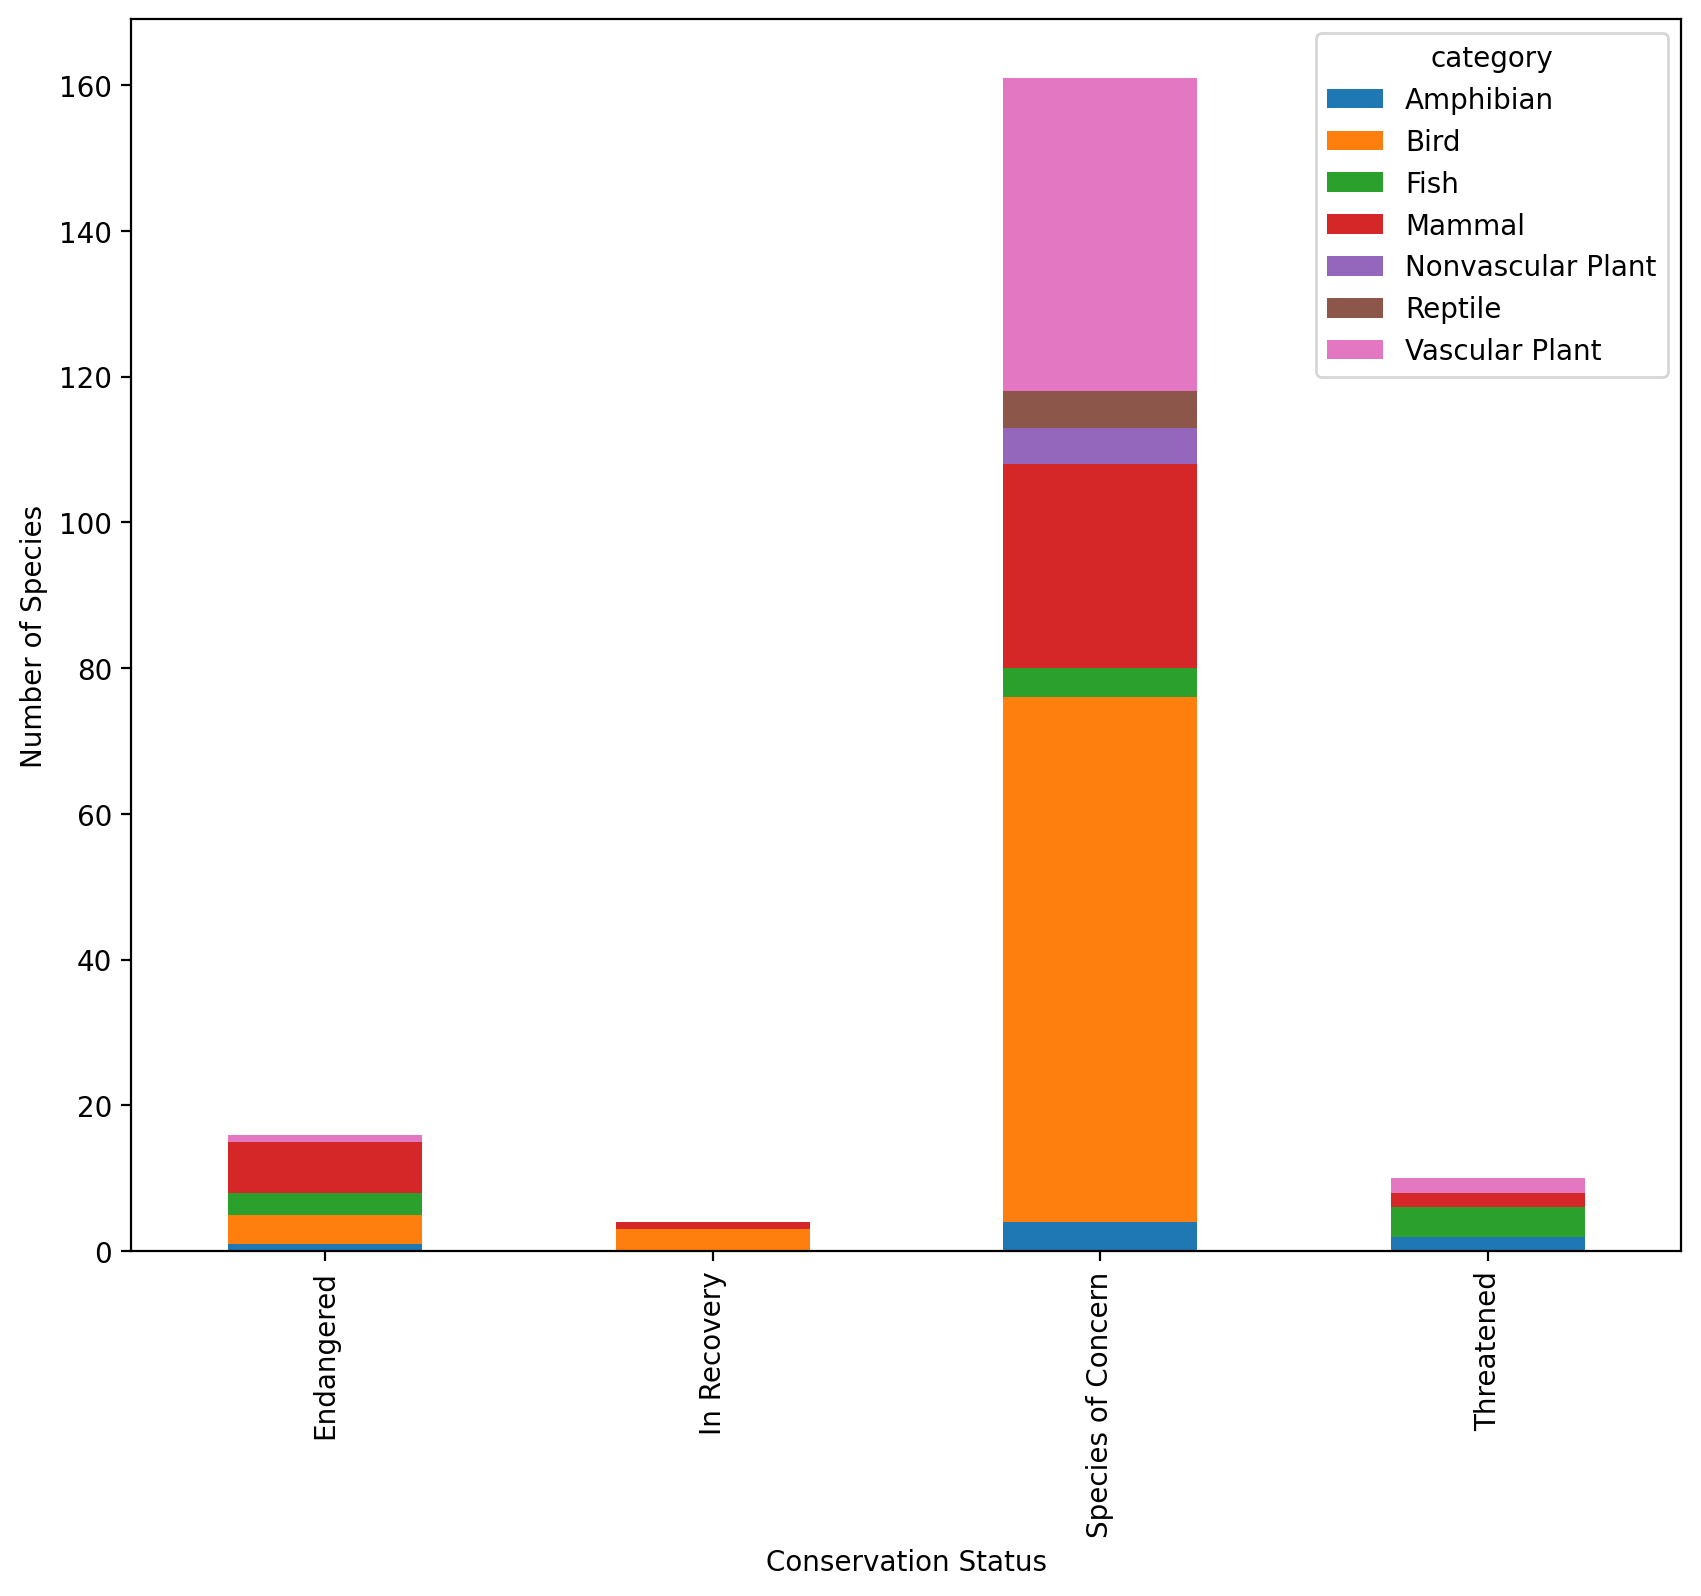

In [16]:

ax = conservedspecies.plot(kind='bar', stacked=True, figsize=(10,8))
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')

### Conserved species
The next question to ask is if certain types of species are more likely to be endangered. This will include all species that were not in the `No Intervention` group. A new column `is_protected` is created for this group.

In [17]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [18]:
category_counts = species.groupby(['category','is_protected'])\
    ['scientific_name'].nunique()\
    .reset_index()\
    .pivot(columns='is_protected',
          index='category', 
          values='scientific_name')\
    .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Calculation was done to investigate the percentage of protected species in each category. The two categories of species with the highest percentage are mammals with ~17.0% and birds with ~15.4%

In [19]:
category_counts['percent_protected'] = round(category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100, 1)

category_counts[['category','percent_protected']]

,category,percent_protected
0,Amphibian,8.9
1,Bird,15.4
2,Fish,8.7
3,Mammal,17.0
4,Nonvascular Plant,1.5
5,Reptile,6.4
6,Vascular Plant,1.1


### Statistical Significance

It is difficult to tell how significant is one category of species more prone to needing protection from another just by the table above. To investigate such significance, contingency table are created and chi squared test are ran. 

The first pair of category to be investigated is mammal and bird. A table called `contingency1` is created like this:

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|Bird|75|413|

The result of a chi-squared test returns many values, second of which is the p-value, which has a standard value of 0.05 under which would denote statistical significance. The p-value resulted from `contingency1` is 0.69, larger than the standard p_value, thus showing a low statistical significance. In other words, the variables mammals and birds do not have significant between them.

In [20]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
               [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The next pair of categories is `Mammal` and `Reptile`. The `contingency2` table created from this pair is formatted as below:

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|Reptile|5|73|

Again, the p-value resulted is 0.038 (<0.05), suggesting the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needing protection compared with Reptiles. 

In [21]:
contingency2 = [[30, 146], 
                [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

### Species in Parks

In this analysis section, data from observation of recording sightings of different species at several national parks in the past 7 days will be used.

Firstly, to understand which animals are most prevalent, the common names of mammals from `species` will be split up into individual names.

In [22]:
import string

def remove_punctuations(value):
    for punctuation in string.punctuation:
        value = value.replace(punctuation,'')
    return value

species_mammals = species[['common_names']][species.category == 'Mammal']
species_mammals['name_series'] = species_mammals\
                    .common_names\
                    .apply(remove_punctuations)\
                    .str.split()
print(species_mammals.head())

                                        common_names  \
0                           Gapper's Red-Backed Vole   
1                              American Bison, Bison   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)   
4                                      Wapiti Or Elk   

                                         name_series  
0                         [Gappers, RedBacked, Vole]  
1                           [American, Bison, Bison]  
2  [Aurochs, Aurochs, Domestic, Cattle, Feral, Do...  
3  [Domestic, Sheep, Mouflon, Red, Sheep, Sheep, ...  
4                                  [Wapiti, Or, Elk]  


The next steip is to clean up duplicate words in each row.

In [23]:
def clear_row(lst):
    cleared_lst = list(set(lst))
    return cleared_lst

species_mammals['cleared_row'] = species_mammals.name_series.apply(clear_row)

print(species_mammals.head())

                                        common_names  \
0                           Gapper's Red-Backed Vole   
1                              American Bison, Bison   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)   
4                                      Wapiti Or Elk   

                                         name_series  \
0                         [Gappers, RedBacked, Vole]   
1                           [American, Bison, Bison]   
2  [Aurochs, Aurochs, Domestic, Cattle, Feral, Do...   
3  [Domestic, Sheep, Mouflon, Red, Sheep, Sheep, ...   
4                                  [Wapiti, Or, Elk]   

                                        cleared_row  
0                        [Gappers, Vole, RedBacked]  
1                                 [Bison, American]  
2  [Cattle, Domestic, Domesticated, Feral, Aurochs]  
3            [Red, Feral, Mouflon, Sheep, Domestic]  
4                                 [Elk, Or, Wapiti]  


In order to count the words in names with the most occurrences, the values in `name_series` has to be stacked together into a list first.

In [24]:
name_list = []
for row in species_mammals.cleared_row:
    for word in row:
        name_list.append(word)

print(name_list[:10])

['Gappers', 'Vole', 'RedBacked', 'Bison', 'American', 'Cattle', 'Domestic', 'Domesticated', 'Feral', 'Aurochs']


Now the list is ready to be counted. As shown below, the word `Bat` that topped the wordcount occurred 23 times, following by `Shrew` with 18 times and `Myotis` (also a kind of bat) with 17.

In [25]:
def count_occurences(word):
    for i in name_list:
        c = name_list.count(word)
    return c
    
wordcount = pd.DataFrame({'word': name_list})
wordcount.drop_duplicates(keep='first', inplace=True)
wordcount['count'] = wordcount.word.apply(count_occurences)

wordcount.sort_values(by='count', ascending=False).head(10)

,word,count
71,Bat,23
206,Shrew,18
86,Myotis,17
147,Mouse,16
200,Chipmunk,13
185,Squirrel,12
4,American,12
1,Vole,11
50,Eastern,11
40,Mountain,10


A further investigation into the bats might shed light into the protected population of species. Next, a new column `is_bat` made up of boolean values will be created to pull all rows of `species` referring to bats.

In [26]:
species['is_bat'] = species.common_names.str.contains(r"Bat", regex = True)
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


The following are rows with the word `Bat` in `common_names` i.e. `True` in row `is_bat`.

In [27]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


The question posed for next step is: how many total bat observations were made at each national park?

It is obvious that the result from above needs to be be merged with the data from `observations` to answer the question. A new `DataFrame` called `bat_observations` is created.

In [4]:
bat_observations = pd.merge(obs, species[species.is_bat], how='right', on='scientific_name')

bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
1,Corynorhinus rafinesquii,Great Smoky Mountains National Park,80,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
2,Corynorhinus rafinesquii,Bryce National Park,57,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
3,Corynorhinus rafinesquii,Yellowstone National Park,259,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
4,Eptesicus fuscus,Yellowstone National Park,227,Mammal,Big Brown Bat,Species of Concern,True,True
...,...,...,...,...,...,...,...,...
147,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
148,Parastrellus hesperus,Great Smoky Mountains National Park,81,Mammal,Canyon Bat,No Intervention,False,True
149,Parastrellus hesperus,Bryce National Park,93,Mammal,Canyon Bat,No Intervention,False,True
150,Parastrellus hesperus,Yosemite National Park,149,Mammal,Canyon Bat,No Intervention,False,True


Let's group `bats_observations` by their park location to get the total counts of bats (over all species) sightings in each park.

The total number of bats observed in each park over the past 7 days are in the table created below. Yellowstone National Park has to most recorded sightings with 8,901 observations while the Great Smoky Mountains National Park has the least observations of 2,513.

In [5]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3625
1,Great Smoky Mountains National Park,2513
2,Yellowstone National Park,8901
3,Yosemite National Park,5104


The next proceeding would be to ask the number of protected and non-protected bats in each park. Below is a table and a bar chart created to show the observations of bats in the past week in the four parks. 

From the chart we can see that Bryce National Park seems to be on a good track in conservation since there are more sightings of protected bats compared to non-protected ones. The other three National Parks might need to look into their conservation strategies as they have more non-protected species.

In [2]:
protected_bats = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()

protected_bats

,park_name,is_protected,observations
0,Bryce National Park,False,1788
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1401
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4583
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2663
7,Yosemite National Park,True,2441


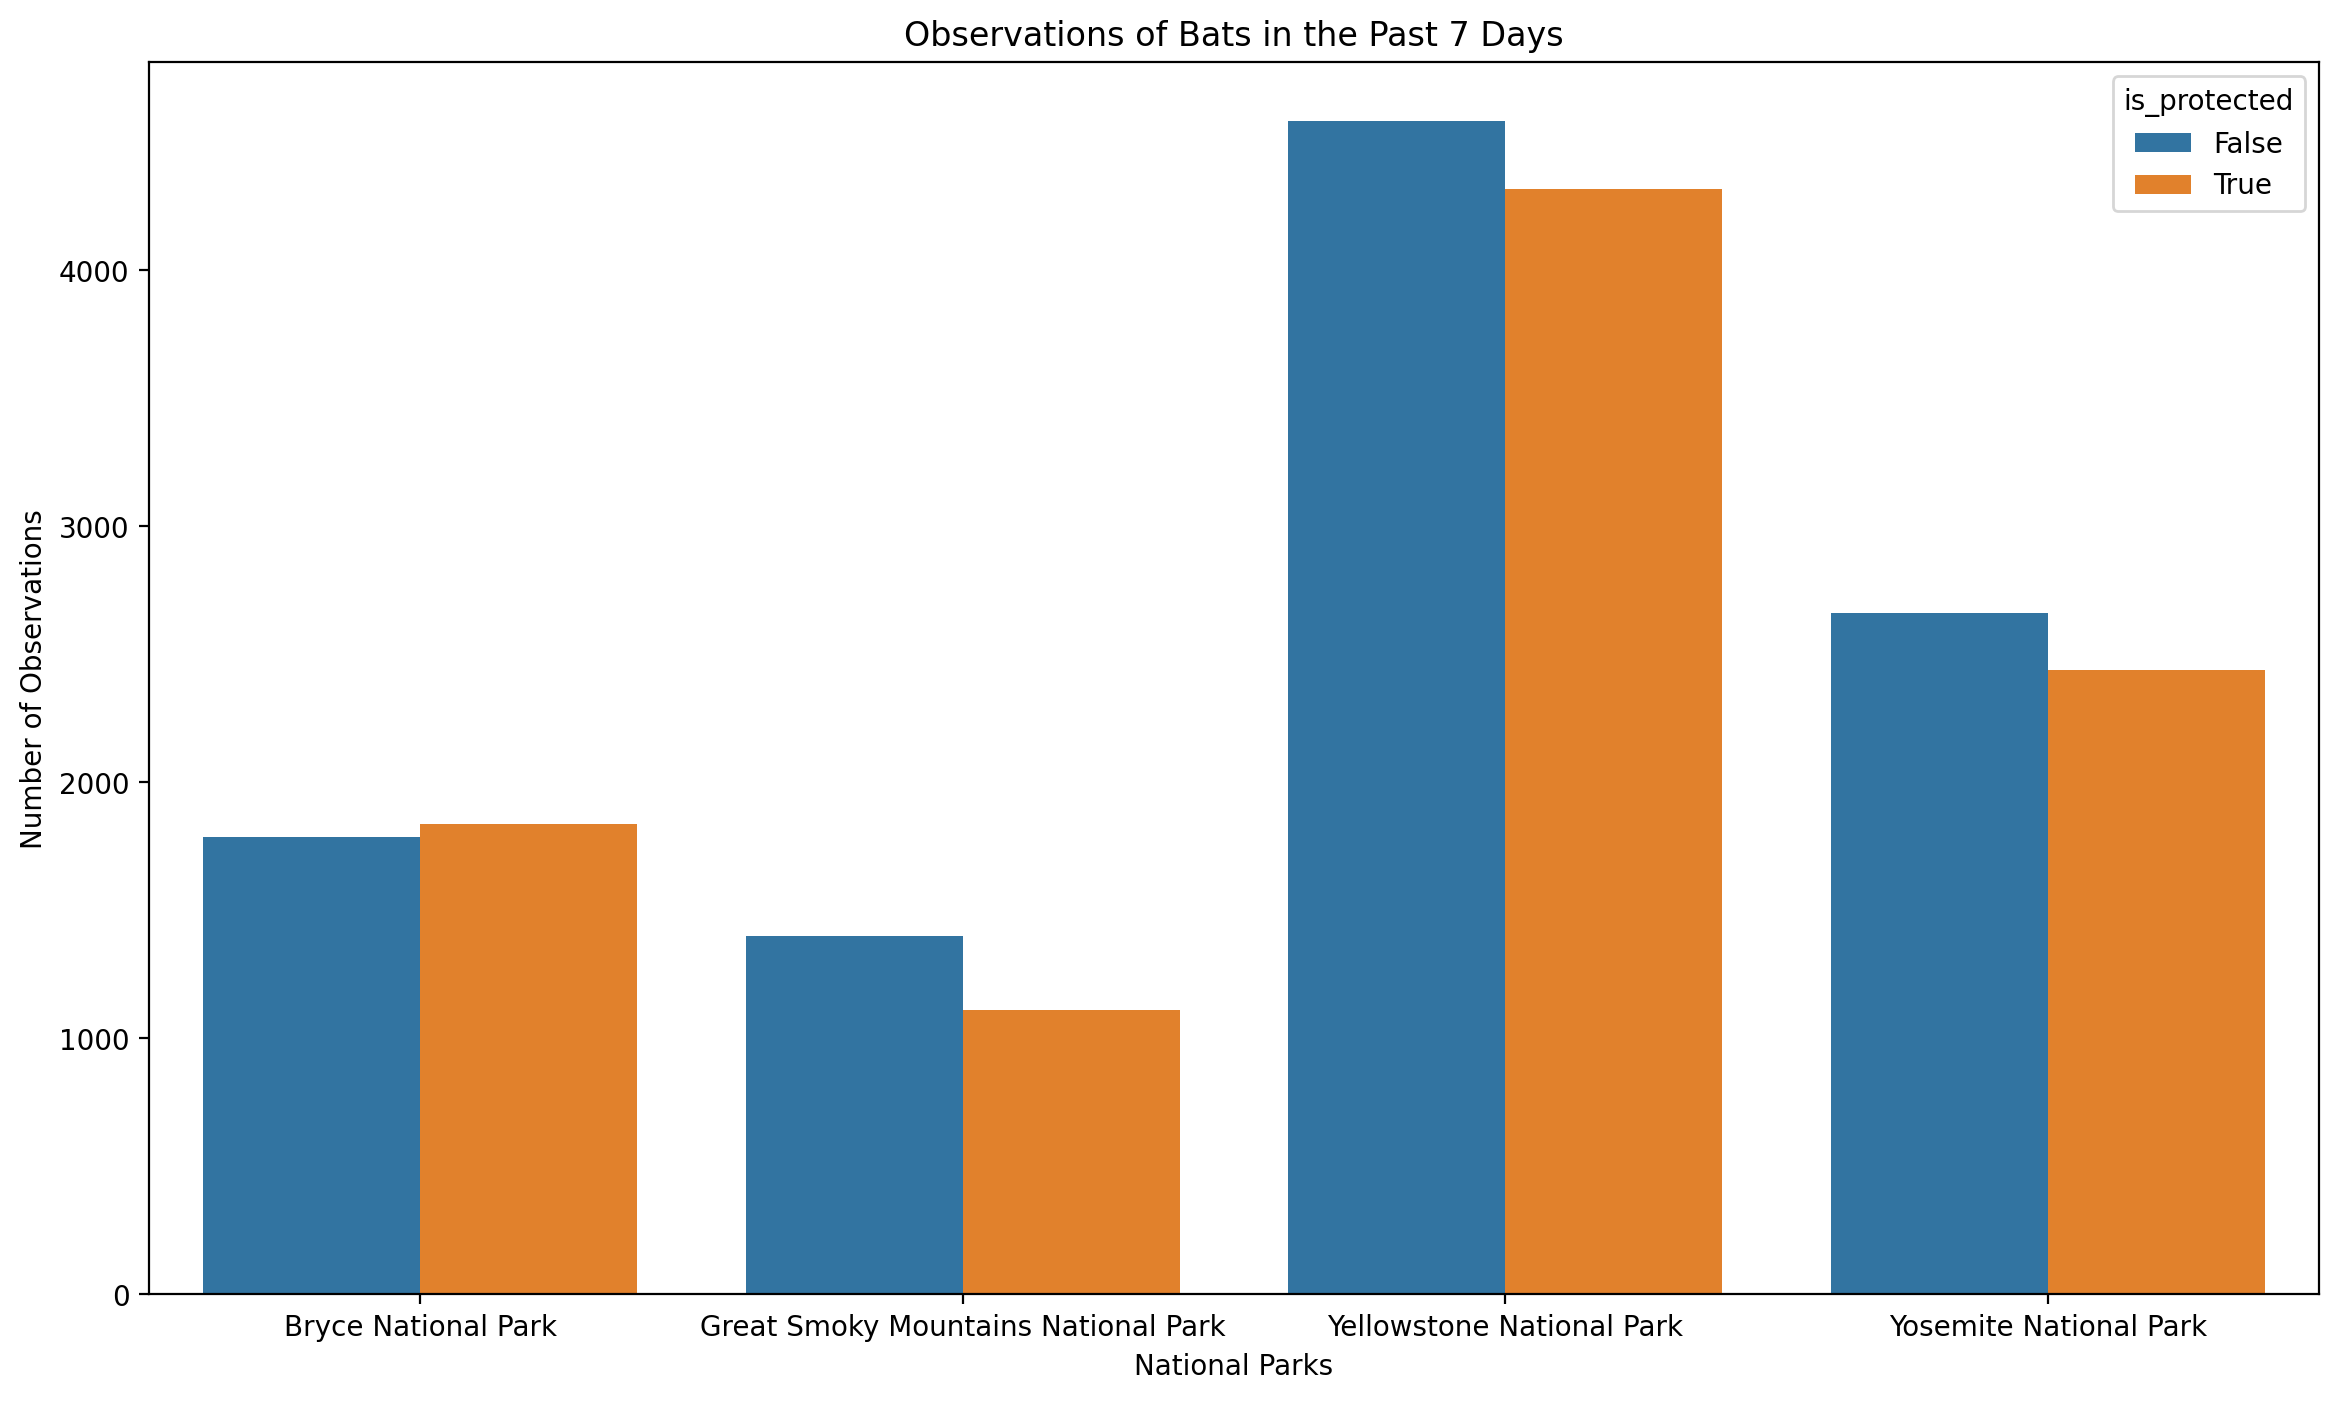

In [1]:
plt.figure(figsize=(14, 8))
sns.barplot(data=protected_bats, x='park_name', y='observations', hue='is_protected')
plt.title('Observations of Bats in the Past 7 Days')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.show()

# Conclusions

This project made several data visualizations and inferences on various species in four of the National Parks that comprised the data set.

The project was able to answer some of the questions posed in the beginning:


- What is the distribution of conservation status for species?
    -  Most species were not part of conservation. (5,633 vs 191)
- Are there certain types of species more prone to endangerment?
    -  Mammals and Birds had the highest percentage of being in protection. (17.0%, 15.4%)
- Are there significant differences between species and their conservation status?
    -  Mammals are shown to have a statistically significant higher rate of needed protection compared with reptiles.
- Which animal is most prevalent and how are they distributed amongst parks?
    -  Bats are most prevalent with the majority of sightings recorded at Yellowstone National Park and the least at Great Smoky Mountains National Park. (8,901, 2,513)

# Further Research

This dataset consist of observations from only 1 week. It is not sufficient to draw any conclusions of changes over time which would be a great way to monitor for species population as well as understanding the effectiveness of conservation strategy. Moreover, the area of each park could affect greatly on the population size of species. It would be more ideal to have the area included in the dataset. 